### Wikipedia2Vec Installation and Familiarization

In [ ]:
pip install wikipedia2vec

In [37]:
from wikipedia2vec import Wikipedia2Vec

In [ ]:
# link for the pre-trained embeddings: http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.txt.bz2

In [ ]:
import os

# check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: d:\Academic-Oulu\Natural Language Processing and Text Mining 521158S-3005\Group Projects\Project28 - Wordsense Disambiguation\wordsense-disambiguation-using-wikipedia


In [ ]:
import requests

# URL of the pretrained model - from wikipedia2vec site - https://wikipedia2vec.github.io/wikipedia2vec/pretrained/
url = 'http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2'

# GET request to the URL
response = requests.get(url)

# saving the zipped content file
with open('enwiki_20180420_100d.pkl.bz2', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [ ]:
# load pre-trained embeddings - en
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

In [ ]:
# xxample: Get the embedding for the word "chair"
word_embedding = wiki2vec.get_word('chair')

# xxample: Get the embedding for an entity "Chair (academic position)"
entity_embedding = wiki2vec.get_entity('Chair')

In [47]:
print(word_embedding)
print(entity_embedding)

<Word chair>
<Entity Chair>


In [ ]:
# familiarizing with the Wikipedia2Vec functions available

word_embedding1 = wiki2vec.get_word('awarded')
word_embedding2 = wiki2vec.get_word('computer')
word_embedding3 = wiki2vec.get_word('science')

print(word_embedding1)
print(word_embedding2)
print(word_embedding3)

<Word awarded>
<Word computer>
<Word science>


In [30]:
word_vec_emb = wiki2vec.get_word_vector('chair')
word_vec_emb1 = wiki2vec.get_word_vector('awarded')
word_vec_emb2 = wiki2vec.get_word_vector('computer')
word_vec_emb3 = wiki2vec.get_word_vector('science')

In [ ]:
print(word_vec_emb)
print(word_vec_emb1)
print(word_vec_emb2)
print(word_vec_emb3)

In [ ]:
# identify the shape of the vector from the pre-trained embedding model loaded
wiki2vec.get_word_vector('awarded').shape

(100,)

In [237]:
# calculating the most similar vector embedding words to a given word
wiki2vec.most_similar(wiki2vec.get_word('chair'), 5)

[ItemWithScore(item=<Word chair>, score=1.0000001192092896),
 ItemWithScore(item=<Word chairperson>, score=0.7606598138809204),
 ItemWithScore(item=<Word chairs>, score=0.756527304649353),
 ItemWithScore(item=<Word chaired>, score=0.7564043402671814),
 ItemWithScore(item=<Word chairing>, score=0.7534357309341431)]

In [ ]:
# calculating the most similar vector embedding entity to a given word
wiki2vec.most_similar(wiki2vec.get_entity('Chair'), 5)

[ItemWithScore(item=<Entity Chair>, score=0.9999998807907104),
 ItemWithScore(item=<Entity Crate>, score=0.6209840774536133),
 ItemWithScore(item=<Word ladderback>, score=0.6175653338432312),
 ItemWithScore(item=<Entity Armrest>, score=0.6162238121032715),
 ItemWithScore(item=<Word chairs>, score=0.6137146353721619)]

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine

# function for cosine similarity calculation
def cosine_similarity(vec1, vec2):
        return 1 - cosine(vec1,vec2)

# get context word embeddings
context_embeddings = [wiki2vec.get_word_vector(word) for word in ["awarded", "computer", "science"]]

# calculate similarity between each context word and the target word
for context in context_embeddings:
    similarity_score = cosine_similarity(word_vec_emb, context)
    print("Similarity with 'chair':", similarity_score)


Similarity with 'chair': 0.3565337648193474
Similarity with 'chair': 0.3353887714813817
Similarity with 'chair': 0.40236920563885914


#### Project 28: Wordsense Disambiguation Using Wikipedia
- Question 6) Instead of the Wikisim Framework (which is outdated and difficult to implement with running the servers and populating the graph databases), using Wikipedia2Vec framework.

#### Import libraries required for WSD


In [ ]:
#import libraries
import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn

In [ ]:
#install Wikipedia2Vec framework
pip install wikipedia2vec

In [ ]:
# download required knowledge bases for comparison
nltk.download('wordnet')

In [ ]:
# download senseval-2 dataset for evaluation
nltk.download("senseval")

In [ ]:
import requests

# get the pre-trained embeddings from the URL : specs --> enwiki_20180420 (window=5, iteration=10, negative=15): 100d (bin) - each embedding has 100 dimension vector (100,)
url = 'http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2'

# GET request to the URL
response = requests.get(url)

# save the wikipedia embedding content as a bz2 zip file 
with open('enwiki_20180420_100d.pkl.bz2', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [ ]:
# import the framework
from wikipedia2vec import Wikipedia2Vec

# extract the downloaded zip file manually and load the pre-trained embeddings file (extension type .pkl)
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

In [ ]:
# task 1 : run simple similarity between word pairs

# define example words
word1 = "look"
word2 = "watch"

# function to check whether for a given word embedding exists otherwise return None
def check_embedding_exist(word):
    word_emb = wiki2vec.get_word(word)
    if word_emb != None:
        print(f"Word '{word}' embedding exist: {word_emb}")
    else:
        print(f"Word '{word}' not found in Wikipedia2Vec embeddings, using lowercase words might solve the issue")

# check word embedding existence using loaded embedding database in wiki2vec
check_embedding_exist(word1)
check_embedding_exist(word2)

Word 'look' embedding exist: <Word look>
Word 'watch' embedding exist: <Word watch>


In [ ]:
# import cosine
from scipy.spatial.distance import cosine

# Function for cosine similarity calculation
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1,vec2)

# function to extract the embeddings for a given word if exists otherwise return None
def get_embedding(word):
    try:
        return wiki2vec.get_word_vector(word)
    except KeyError:
        print(f"'{word}' not found in Wikipedia2Vec embeddings")
        return None

# get the embedding vectors of each for cosine similarity
word1_vec_embedding = wiki2vec.get_word_vector(word1)
word2_vec_embedding = wiki2vec.get_word_vector(word2)

similarity_score = cosine_similarity(word1_vec_embedding, word2_vec_embedding)
print(f"similarity between '{word1}' and '{word2}':", similarity_score)

similarity between 'look' and 'watch': 0.5782222618096504


In [ ]:
# provided sentence S
sentence = "I was awarded a chair in computer science"
target_word = "chair"

In [291]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

words = word_tokenize(sentence)

# get pos tags associated to all words in the sentence
pos_words = pos_tag(words)
print(pos_words)

[('I', 'PRP'), ('was', 'VBD'), ('awarded', 'VBN'), ('a', 'DT'), ('chair', 'NN'), ('in', 'IN'), ('computer', 'NN'), ('science', 'NN')]


In [292]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def preProcess(sentence):
    # tokenize and extract stop word list in English
    Stopwords = list(set(nltk.corpus.stopwords.words('english')))
    words = word_tokenize(sentence)

    # get pos tags associated to all words in the sentence
    pos_words = pos_tag(words)
    
    # filtering
    words = [word.lower() for (word,pos) in pos_words if word.isalpha() and word not in Stopwords and pos not in ('PRP') and word != target_word] 
    return words

context_words = preProcess(sentence.lower())
print(context_words)

['awarded', 'computer', 'science']


In [ ]:
from nltk.wsd import lesk

# applying Lesk algorithm
lesk_sense = lesk(sentence.split(), target_word)

# display the synset name and definition for most overlapping sense
print("Lesk selected sense:", lesk_sense)
print("Definition:", lesk_sense.definition())

Lesk selected sense: Synset('chair.v.01')
Definition: act or preside as chair, as of an academic department in a university


In [ ]:
# using wikipedia2Vec extract the embeddings for the target word and context words

target_embedding = get_embedding(target_word)
context_embeddings = {word: get_embedding(word) for word in context_words if get_embedding(word) is not None}

print("Target embedding:", target_embedding)
print("Context embeddings:", context_embeddings)

In [311]:
# Calculate similarity scores
similarity_scores = {}
for word, embed_vec in context_embeddings.items():
    if target_embedding is not None and embed_vec is not None:
        similarity_scores[word] = cosine_similarity(target_embedding, embed_vec)

print(f"similarity scores of word '{target_word}' with each context word'", similarity_scores)

similarity scores of word 'chair' with each context word' {'awarded': 0.3565337648193474, 'computer': 0.3353887714813817, 'science': 0.40236920563885914}


In [287]:
# In order to compare the similarity score with other senses of the word 'chair', need to get them using wordsense knowledge bases or wikipedia entries.

In [ ]:
from nltk.corpus import senseval

# understanding Senseeval-2 dataset structure

# instance for the word "interest"
instances = senseval.instances("interest.pos")
example_instance = instances[9]

# displaying structure of example instance
print("Target Word:", example_instance.word)
print("Context:", [(w, pos) for (w, pos) in example_instance.context])
print("Sense Label(s):", example_instance.senses)


Target Word: interest-n
Context: [('that', 'DT'), ('stake', 'NN'), (',', ','), ('together', 'RB'), ('with', 'IN'), ('its', 'PRP$'), ('convertible', 'JJ'), ('preferred', 'JJ'), ('stock', 'NN'), ('holdings', 'NNS'), (',', ','), ('gives', 'VBZ'), ('faulding', 'VBG'), ('the', 'DT'), ('right', 'NN'), ('to', 'TO'), ('increase', 'VB'), ('its', 'PRP$'), ('interest', 'NN'), ('to', 'TO'), ('70', 'CD'), ('%', 'NN'), ('of', 'IN'), ('moleculon', 'NN'), ("'s", 'POS'), ('voting', 'NN'), ('stock', 'NN'), ('.', '.')]
Sense Label(s): ('interest_5',)


In [ ]:
# Evaluation results for Senseeval-2 dataset (TBD)

#### Question 7) Comparison of similarity performance of Wikipedia2Vec, word2vec, GloVe and FastText based on benchmark datasets (MC, RG and WS353)

In [ ]:
pip install pandas scipy gensim seaborn matplotlib


In [ ]:
import pandas as pd

# load datasets
mc_df = pd.read_csv('datasets/mc.csv', sep=';')
rg_df = pd.read_csv('datasets/rg.csv', sep=';')
ws353_df = pd.read_csv('datasets/wordsim.csv', sep=';')

# display the dataset structures
print("MC Dataset:\n", mc_df.head())
print("\nRG Dataset:\n", rg_df.head())
print("\nWS353 Dataset:\n", ws353_df.head())


MC Dataset:
         word1   word2  score
0  automobile     car   3.92
1         gem   jewel   3.84
2     journey  voyage   3.84
3         boy     lad   3.76
4       coast   shore   3.70

RG Dataset:
        word1    word2  score
0       cord    smile   0.02
1    rooster   voyage   0.04
2       noon   string   0.04
3      fruit  furnace   0.05
4  autograph    shore   0.06

WS353 Dataset:
       word1     word2  score
0      love       sex   6.77
1     tiger       cat   7.35
2     tiger     tiger  10.00
3      book     paper   7.46
4  computer  keyboard   7.62


In [299]:
import gensim.downloader

gensim.downloader.info(name_only=True)

{'corpora': ['semeval-2016-2017-task3-subtaskBC',
  'semeval-2016-2017-task3-subtaskA-unannotated',
  'patent-2017',
  'quora-duplicate-questions',
  'wiki-english-20171001',
  'text8',
  'fake-news',
  '20-newsgroups',
  '__testing_matrix-synopsis',
  '__testing_multipart-matrix-synopsis'],
 'models': ['fasttext-wiki-news-subwords-300',
  'conceptnet-numberbatch-17-06-300',
  'word2vec-ruscorpora-300',
  'word2vec-google-news-300',
  'glove-wiki-gigaword-50',
  'glove-wiki-gigaword-100',
  'glove-wiki-gigaword-200',
  'glove-wiki-gigaword-300',
  'glove-twitter-25',
  'glove-twitter-50',
  'glove-twitter-100',
  'glove-twitter-200',
  '__testing_word2vec-matrix-synopsis']}

In [ ]:
# download the required models pre-trained embedding files
word2vec_model = gensim.downloader.load('word2vec-google-news-300')
fasttext_model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [297]:
glove_model = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [300]:
from scipy.spatial.distance import cosine

# function to get Wikipedia2Vec vector embeddings for cosine similarity
def get_wikipedia2vec_similarity_score(word1, word2, model):
    try:
        vec1 = model.get_word_vector(word1)
        vec2 = model.get_word_vector(word2)
        return 1 - cosine(vec1, vec2)
    except KeyError:
        return None

# function to get other models(word2vec, glove, fassttext) vector embeddings for cosine similarity
def get_other_model_similarity(word1, word2, embedding_model):
    try:
        vec1 = embedding_model[word1]
        vec2 = embedding_model[word2]
        return 1 - cosine(vec1, vec2)
    except KeyError:
        return 0


In [ ]:
# function to calculate cosine similarities
def calculate_similarities(df):
    
    # initialize lists to store the similarity scores
    wikipedia2vec_scores = []
    word2vec_scores = []
    glove_scores = []
    fasttext_scores = []
    
    # loop over each word pairs in a dataset to find cosine similarity of each of them
    for _, row in df.iterrows():
        word1 = row['word1']
        word2 = row['word2']
        
        # using Wikipedia2Vec Embeddings
        wiki_score = get_wikipedia2vec_similarity_score(word1.lower(), word2.lower(), wiki2vec)
        wikipedia2vec_scores.append(wiki_score)
        
        # using word2vec Embeddings
        w2v_score = get_other_model_similarity(word1, word2, word2vec_model)
        word2vec_scores.append(w2v_score)

        # using GloVe Embeddings
        glove_score = get_other_model_similarity(word1, word2, glove_model)
        glove_scores.append(glove_score)

        # using FastText Embeddings
        fasttext_score = get_other_model_similarity(word1, word2, fasttext_model)
        fasttext_scores.append(fasttext_score)

    # return the populated score values from each model
    return wikipedia2vec_scores, word2vec_scores, glove_scores, fasttext_scores

# calculate similarities for each dataset
mc_results = calculate_similarities(mc_df)
rg_results = calculate_similarities(rg_df)
ws353_results = calculate_similarities(ws353_df)


In [ ]:
#print the outputs
#print(mc_results)
#print(rg_results)
#print(ws353_results)

In [ ]:
# since the human judgement scores are in different scales need to normalize the calculated cosine similarity score scale (0 - 1) --> to relevant dataset human judgment scale for comparison with correlation
# For MC and RG - score scale (0 - 4)
# For WS353 - score scale (0-10)

# normalize score based on min and max scores in each scale
def normalize_scores(scores, new_min, new_max):
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [new_min + (score - min_score) * (new_max - new_min) / (max_score - min_score) for score in scores]
    return normalized_scores

# apply normalization to each dataset with the specific scales
mc_results_normalized = tuple([normalize_scores(sim_list, 0, 4) for sim_list in mc_results])
rg_results_normalized = tuple([normalize_scores(sim_list, 0, 4) for sim_list in rg_results])
ws353_results_normalized = tuple([normalize_scores(sim_list, 0, 10) for sim_list in ws353_results])

# output the results
#print("MC Results Normalized:", mc_results_normalized)
#print("RG Results Normalized:", rg_results_normalized)
#print("WS353 Results Normalized:", ws353_results_normalized)


In [ ]:
from scipy.stats import pearsonr

# correlation computation function
def compute_correlation(human_scores, model_scores):
    
    filtered_scores = [(human, model) for human, model in zip(human_scores, model_scores)]
    if len(filtered_scores) > 0:
        human, model = zip(*filtered_scores)
        return pearsonr(human, model)[0]
    return None

# compute correlations store as a dictionary output for each dataset and model
corr_results = {}

# define the dataset structure
datasets = {'MC': mc_df, 'RG': rg_df, 'WS353': ws353_df}

# loop through each dataset and calculate correlation scores
for dataset_name, df in datasets.items():

    # call normalize functions 
    if dataset_name == 'MC':
        sim_scores = mc_results_normalized
    elif dataset_name == 'RG':
         sim_scores = rg_results_normalized
    else:
        sim_scores = ws353_results_normalized

    # calculate pearson correlation values
    corr_results[dataset_name] = {
        'Wikipedia2Vec': compute_correlation(df['score'], sim_scores[0]),
        'word2vec': compute_correlation(df['score'], sim_scores[1]),
        'GloVe': compute_correlation(df['score'], sim_scores[2]),    
        'FastText': compute_correlation(df['score'], sim_scores[3])
    }

#print(corr_results)

In [ ]:
# convert to a DataFrame for tabulating the results
corr_df = pd.DataFrame(corr_results).T

# output
print(corr_df)

       Wikipedia2Vec  word2vec     GloVe  FastText
MC          0.807868  0.792852  0.740547  0.852745
RG          0.755091  0.772062  0.751622  0.866292
WS353       0.665123  0.652535  0.520931  0.698066


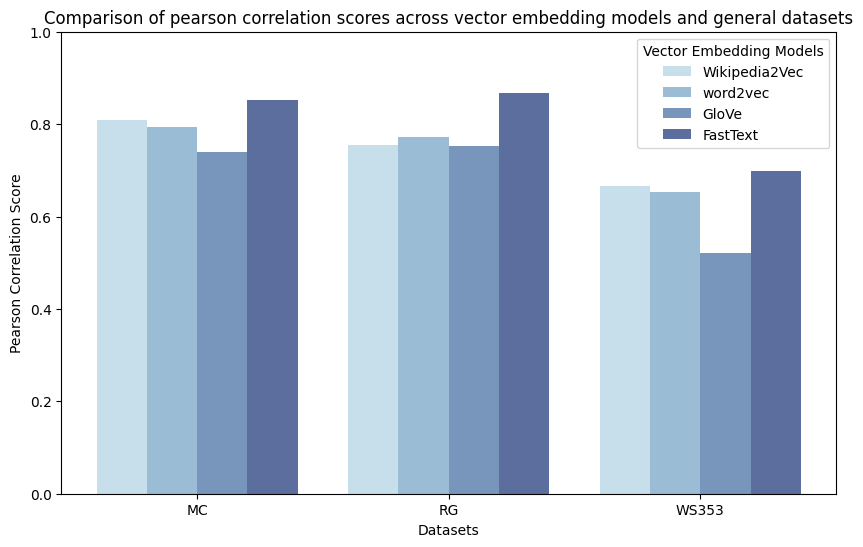

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# set color palette using seaborn
# sns.set_palette("mako")
sns.set_palette("ch:start=.1,rot=-.2")

# set configurations
x = np.arange(len(corr_df.index))

# initialize 
fig, ax = plt.subplots(figsize=(10, 6))

# plot each model as a group of bars
for i, (model,color) in enumerate(zip(corr_df.columns, sns.color_palette())):
    ax.bar(x + i*0.2, corr_df[model], width=0.2, label=model, color=color)

# plot details
ax.set_xlabel('Datasets')
ax.set_ylabel('Pearson Correlation Score')
ax.set_title('Comparison of pearson correlation scores across vector embedding models and general datasets')
ax.set_xticks(x + 0.2 * (len(corr_df.columns) - 1) / 2)
ax.set_xticklabels(corr_df.index)
ax.set_ylim(0, 1)
ax.legend(title="Vector Embedding Models")
plt.show()

8) Generating a new vector - A convex combination between Wikipedia2Vec vector and FastText vector. (TBD)